In [66]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC , SVR
from sklearn.metrics import classification_report, confusion_matrix ,r2_score
import matplotlib.pyplot as plt 
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
df = pd.read_csv('/Users/raidneghiz/Documents/SVM_CHECKPOINT/Electric_cars_dataset.csv')
df.head()

ID  VIN (1-10)     County        City State  ZIP Code  Model Year  \
0  EV33174  5YJ3E1EC6L  Snohomish    LYNNWOOD    WA   98037.0      2020.0   
1  EV40247  JN1AZ0CP8B     Skagit  BELLINGHAM    WA   98229.0      2011.0   
2  EV12248  WBY1Z2C56F     Pierce      TACOMA    WA   98422.0      2015.0   
3  EV55713  1G1RD6E44D       King     REDMOND    WA   98053.0      2013.0   
4  EV28799  1G1FY6S05K     Pierce    PUYALLUP    WA   98375.0      2019.0   

        Make    Model                   Electric Vehicle Type  \
0      TESLA  MODEL 3          Battery Electric Vehicle (BEV)   
1     NISSAN     LEAF          Battery Electric Vehicle (BEV)   
2        BMW       I3          Battery Electric Vehicle (BEV)   
3  CHEVROLET     VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
4  CHEVROLET  BOLT EV          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible             308   
1           Clean Alternative Fuel Vehicle Eligible              73   
2           Clean Alternative Fuel Vehicle Eligible              81   
3           Clean Alternative Fuel Vehicle Eligible              38   
4           Clean Alternative Fuel Vehicle Eligible             238   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                  32.0       109821694   
1          0                  40.0       137375528   
2          0                  27.0       150627382   
3          0                  45.0       258766301   
4          0                  25.0       296998138   

                Vehicle Location  \
0   POINT (-122.287614 47.83874)   
1  POINT (-122.414936 48.709388)   
2  POINT (-122.396286 47.293138)   
3  POINT (-122.024951 47.670286)   
4  POINT (-122.321062 47.103797)   

                                    Electric Utility Expected Price ($1k)  
0                             PUGET SOUND ENERGY INC                   50  
1                             PUGET SOUND ENERGY INC                   15  
2  BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...                   18  
3      PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                 33.9  
4  BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...                41.78

In [5]:
df.shape

(64353, 18)

In [6]:
df.dtypes

ID                                                    object
VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
ZIP Code                                             float64
Model Year                                           float64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility        

In [7]:
df.describe()

ZIP Code    Model Year  Electric Range      Base MSRP  \
count  64347.000000  64346.000000    64353.000000   64353.000000   
mean   98143.452888   2018.186212      106.948985    2524.990754   
std     2856.064329      2.726742      104.093919   12402.895104   
min      745.000000   1993.000000        0.000000       0.000000   
25%    98052.000000   2017.000000       14.000000       0.000000   
50%    98121.000000   2018.000000       73.000000       0.000000   
75%    98370.000000   2021.000000      215.000000       0.000000   
max    99701.000000   2022.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  
count          64184.000000    6.435300e+04  
mean              29.951904    1.972905e+08  
std               14.661124    1.069466e+08  
min                0.000000    4.385000e+03  
25%               19.000000    1.372865e+08  
50%               34.000000    1.753776e+08  
75%               43.000000    2.299039e+08  
max               49.000000    4.789346e+08

In [8]:
df['County'].value_counts()

County
King         33552
Snohomish     6920
Pierce        4825
Clark         3771
Thurston      2446
             ...  
Duval            1
Wilson           1
Queens           1
Placer           1
Tipton           1
Name: count, Length: 139, dtype: int64

In [9]:
df['State'].value_counts()

State
WA    64168
CA       40
MD       22
VA       21
TX       11
OR        6
FL        5
NV        5
NC        5
PA        4
IL        4
HI        4
GA        4
DC        3
NE        3
TN        3
AP        3
NY        3
CT        3
MA        2
IN        2
NJ        2
MT        2
KS        2
NM        2
WI        1
LA        1
UT        1
SD        1
MO        1
AK        1
PR        1
AE        1
DE        1
WY        1
RI        1
MS        1
AZ        1
Name: count, dtype: int64

In [10]:
df['Make'].value_counts()

Make
TESLA                   27903
NISSAN                   8678
CHEVROLET                6651
FORD                     3850
KIA                      3066
BMW                      2707
TOYOTA                   2700
AUDI                     1265
VOLKSWAGEN               1217
CHRYSLER                 1091
HYUNDAI                   894
VOLVO                     688
FIAT                      561
HONDA                     528
PORSCHE                   455
JEEP                      436
MITSUBISHI                376
MINI                      303
MERCEDES-BENZ             248
SMART                     192
POLESTAR                  164
JAGUAR                    142
CADILLAC                   69
LINCOLN                    59
SUBARU                     34
LAND ROVER                 26
RIVIAN                     26
FISKER                     11
AZURE DYNAMICS              3
LUCID MOTORS                2
TH!NK                       1
DODGE                       1
WHEEGO ELECTRIC CARS        1
BENTL

In [11]:
df['Model'].value_counts()

Model
MODEL 3                 13138
LEAF                     8679
MODEL Y                  7622
MODEL S                  4710
VOLT                     3420
                        ...  
A8 E                        1
LIFE                        1
BENTAYGA                    1
918 SPYDER                  1
PRIUS PLUG-IN HYBRID        1
Name: count, Length: 107, dtype: int64

In [12]:
df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].value_counts()

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Clean Alternative Fuel Vehicle Eligible                         39948
Eligibility unknown as battery range has not been researched    14938
Not eligible due to low battery range                            9467
Name: count, dtype: int64

In [13]:
df["Electric Vehicle Type"].value_counts()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            47869
Plug-in Hybrid Electric Vehicle (PHEV)    16484
Name: count, dtype: int64

In [14]:
df["Base MSRP"].value_counts()

Base MSRP
0         61263
69900      1062
34600       359
31950       305
28500       148
52900       143
38500       127
32250       113
59900       105
54950       101
39995        79
33950        64
44100        63
36900        56
64950        51
45600        42
36800        40
52650        38
34995        34
55700        31
98950        14
110950       14
53400        14
75095        12
90700        12
102000       11
81100        11
35390         9
184400        9
43700         7
109000        6
89100         5
66300         1
91250         1
32995         1
845000        1
32000         1
Name: count, dtype: int64

In [15]:
df["Electric Utility"].value_counts()

Electric Utility
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                                               22555
PUGET SOUND ENERGY INC                                                                      12790
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                                                12514
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)                             3768
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY              2899
                                                                                            ...  
BONNEVILLE POWER ADMINISTRATION||CITY OF COULEE DAM - (WA)                                      2
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF ASOTIN COUNTY||INLAND POWER & LIGHT COMPANY        2
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLALLAM COUNTY|PUD NO 1 OF JEFFERSON COUNTY        1
AVISTA CORP||INLAND POWER & LIGHT COMPANY                                                       1
CIT

In [16]:
df['Legislative District'].value_counts()

Legislative District
41.0    4292
45.0    4160
48.0    3786
36.0    3047
46.0    2782
43.0    2749
1.0     2607
5.0     2604
37.0    2092
34.0    2041
22.0    1682
18.0    1664
32.0    1588
40.0    1578
23.0    1575
21.0    1491
44.0    1468
11.0    1415
26.0    1289
10.0    1229
17.0    1076
31.0    1025
42.0     984
24.0     976
47.0     976
27.0     966
49.0     930
35.0     918
33.0     862
28.0     833
39.0     813
30.0     730
2.0      704
8.0      697
38.0     642
20.0     623
25.0     608
6.0      580
12.0     573
4.0      474
19.0     414
13.0     402
29.0     397
14.0     387
9.0      341
3.0      340
16.0     330
7.0      282
15.0     156
0.0        6
Name: count, dtype: int64

In [17]:
df = df.drop(columns = ['State', 'City','Make', 'County', 'ZIP Code', 'ID',
                         'VIN (1-10)', 'Vehicle Location', 'DOL Vehicle ID', 'Electric Utility' , 'Legislative District'])

In [18]:
df.shape

(64353, 7)

In [19]:
df['Expected Price ($1k)'] = pd.to_numeric(df['Expected Price ($1k)'] , errors= 'coerce')

In [20]:
df['Expected Price ($1k)']=df['Expected Price ($1k)']*1000

In [21]:
df['Expected Price ($1k)'].isnull().sum()

np.int64(13)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 7 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Model Year                                         64346 non-null  float64
 1   Model                                              64340 non-null  object 
 2   Electric Vehicle Type                              64353 non-null  object 
 3   Clean Alternative Fuel Vehicle (CAFV) Eligibility  64353 non-null  object 
 4   Electric Range                                     64353 non-null  int64  
 5   Base MSRP                                          64353 non-null  int64  
 6   Expected Price ($1k)                               64340 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 3.4+ MB


In [23]:
df.describe()

Model Year  Electric Range      Base MSRP  Expected Price ($1k)
count  64346.000000    64353.000000   64353.000000          6.434000e+04
mean    2018.186212      106.948985    2524.990754          4.544797e+04
std        2.726742      104.093919   12402.895104          2.472821e+04
min     1993.000000        0.000000       0.000000          0.000000e+00
25%     2017.000000       14.000000       0.000000          2.285700e+04
50%     2018.000000       73.000000       0.000000          4.000000e+04
75%     2021.000000      215.000000       0.000000          6.590000e+04
max     2022.000000      337.000000  845000.000000          1.100000e+06

In [24]:
df = df[df['Expected Price ($1k)'] != 0]

In [25]:
df.describe()

Model Year  Electric Range      Base MSRP  Expected Price ($1k)
count  64344.000000    64351.000000   64351.000000          6.433800e+04
mean    2018.186093      106.952308    2525.069230          4.544938e+04
std        2.726701      104.093829   12403.079855          2.472729e+04
min     1993.000000        0.000000       0.000000          2.800000e+03
25%     2017.000000       14.000000       0.000000          2.285700e+04
50%     2018.000000       73.000000       0.000000          4.000000e+04
75%     2021.000000      215.000000       0.000000          6.590000e+04
max     2022.000000      337.000000  845000.000000          1.100000e+06

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64351 entries, 0 to 64352
Data columns (total 7 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Model Year                                         64344 non-null  float64
 1   Model                                              64338 non-null  object 
 2   Electric Vehicle Type                              64351 non-null  object 
 3   Clean Alternative Fuel Vehicle (CAFV) Eligibility  64351 non-null  object 
 4   Electric Range                                     64351 non-null  int64  
 5   Base MSRP                                          64351 non-null  int64  
 6   Expected Price ($1k)                               64338 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 3.9+ MB


In [27]:
df.isnull().sum()

Model Year                                            7
Model                                                13
Electric Vehicle Type                                 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Range                                        0
Base MSRP                                             0
Expected Price ($1k)                                 13
dtype: int64

In [28]:
X = df['Model Year'].groupby(df['Model'])
result = X.apply(list)
result = pd.DataFrame(result)
result

Model Year
Model                                                           
$16.36K                                                 [2017.0]
330E           [2017.0, 2021.0, 2021.0, 2017.0, 2018.0, 2017....
500            [2015.0, 2013.0, 2015.0, 2014.0, 2014.0, 2015....
530E           [2019.0, 2018.0, 2018.0, 2021.0, 2018.0, 2021....
530E XDRIVE    [2018.0, 2018.0, 2018.0, 2018.0, 2018.0, 2018....
...                                                          ...
XC60 AWD       [2018.0, 2018.0, 2018.0, 2018.0, 2018.0, 2018....
XC60 AWD PHEV  [2019.0, 2019.0, 2019.0, 2019.0, 2019.0, 2019....
XC90           [2016.0, 2019.0, 2016.0, 2017.0, 2019.0, 2016....
XC90 AWD       [2018.0, 2018.0, 2018.0, 2018.0, 2018.0, 2018....
XC90 AWD PHEV                                           [2019.0]

[106 rows x 1 columns]

In [29]:
result_df = result.reset_index()
result_df.columns = ['Model', 'Model Year']
result_df

Model                                         Model Year
0          $16.36K                                           [2017.0]
1             330E  [2017.0, 2021.0, 2021.0, 2017.0, 2018.0, 2017....
2              500  [2015.0, 2013.0, 2015.0, 2014.0, 2014.0, 2015....
3             530E  [2019.0, 2018.0, 2018.0, 2021.0, 2018.0, 2021....
4      530E XDRIVE  [2018.0, 2018.0, 2018.0, 2018.0, 2018.0, 2018....
..             ...                                                ...
101       XC60 AWD  [2018.0, 2018.0, 2018.0, 2018.0, 2018.0, 2018....
102  XC60 AWD PHEV  [2019.0, 2019.0, 2019.0, 2019.0, 2019.0, 2019....
103           XC90  [2016.0, 2019.0, 2016.0, 2017.0, 2019.0, 2016....
104       XC90 AWD  [2018.0, 2018.0, 2018.0, 2018.0, 2018.0, 2018....
105  XC90 AWD PHEV                                           [2019.0]

[106 rows x 2 columns]

In [30]:
mode_per_model = df.groupby('Model')['Model Year'].agg(lambda x: x.mode().iloc[0])
mode_per_model.to_list()

[2017.0,
 2017.0,
 2015.0,
 2019.0,
 2018.0,
 2018.0,
 2020.0,
 2015.0,
 2017.0,
 2021.0,
 2020.0,
 2014.0,
 2021.0,
 2014.0,
 2021.0,
 2017.0,
 2018.0,
 2013.0,
 2022.0,
 1993.0,
 2016.0,
 2011.0,
 2018.0,
 2022.0,
 2019.0,
 2019.0,
 2018.0,
 2019.0,
 2019.0,
 2021.0,
 2014.0,
 2018.0,
 2022.0,
 2021.0,
 2022.0,
 2021.0,
 2013.0,
 2017.0,
 2014.0,
 2016.0,
 2019.0,
 2018.0,
 2022.0,
 2012.0,
 2019.0,
 2014.0,
 2015.0,
 2021.0,
 2020.0,
 2022.0,
 2012.0,
 2020.0,
 2021.0,
 2013.0,
 2011.0,
 2021.0,
 2018.0,
 2015.0,
 2018.0,
 2021.0,
 2017.0,
 2019.0,
 2019.0,
 2017.0,
 2019.0,
 2018.0,
 2021.0,
 2018.0,
 2012.0,
 2012.0,
 2017.0,
 2021.0,
 2022.0,
 2021.0,
 2022.0,
 2020.0,
 2020.0,
 2000.0,
 2014.0,
 2021.0,
 2008.0,
 2022.0,
 2017.0,
 2019.0,
 2018.0,
 2022.0,
 2016.0,
 2016.0,
 2022.0,
 2016.0,
 2017.0,
 2015.0,
 2021.0,
 2011.0,
 2022.0,
 2017.0,
 2021.0,
 2021.0,
 2021.0,
 2021.0,
 2019.0,
 2018.0,
 2019.0,
 2017.0,
 2018.0,
 2019.0]

In [31]:
nan_ind = df[df['Model Year'].isna()].index
nan_ind = nan_ind.to_list()
type(nan_ind)
nan_ind

[18618, 34663, 35578, 50803, 54860, 59409, 62552]

In [32]:
df.loc[18618, 'Model']

'SONATA PLUG-IN HYBRID'

In [33]:
df.loc[18618 , 'Model Year'] =mode_per_model['SONATA PLUG-IN HYBRID']

In [34]:
df.loc[18618 , 'Model Year']

np.float64(2016.0)

In [35]:
df.loc[nan_ind]

Model Year                  Model  \
18618      2016.0  SONATA PLUG-IN HYBRID   
34663         NaN                MODEL 3   
35578         NaN                MODEL S   
50803         NaN                MODEL Y   
54860         NaN                     A3   
59409         NaN                MODEL 3   
62552         NaN                MODEL 3   

                        Electric Vehicle Type  \
18618  Plug-in Hybrid Electric Vehicle (PHEV)   
34663          Battery Electric Vehicle (BEV)   
35578          Battery Electric Vehicle (BEV)   
50803          Battery Electric Vehicle (BEV)   
54860  Plug-in Hybrid Electric Vehicle (PHEV)   
59409          Battery Electric Vehicle (BEV)   
62552          Battery Electric Vehicle (BEV)   

       Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
18618              Not eligible due to low battery range              27   
34663            Clean Alternative Fuel Vehicle Eligible             220   
35578            Clean Alternative Fuel Vehicle Eligible             208   
50803            Clean Alternative Fuel Vehicle Eligible             291   
54860              Not eligible due to low battery range              16   
59409  Eligibility unknown as battery range has not b...               0   
62552  Eligibility unknown as battery range has not b...               0   

       Base MSRP  Expected Price ($1k)  
18618      34600               16365.0  
34663          0               57000.0  
35578      69900               33890.0  
50803          0               72000.0  
54860          0               18860.0  
59409          0               64000.0  
62552          0               64000.0

In [36]:
for idx in nan_ind : 
    model = df.loc[idx , 'Model']
    df.loc[idx , 'Model Year'] = mode_per_model[model]

In [37]:
df.loc[nan_ind]

Model Year                  Model  \
18618      2016.0  SONATA PLUG-IN HYBRID   
34663      2018.0                MODEL 3   
35578      2015.0                MODEL S   
50803      2021.0                MODEL Y   
54860      2017.0                     A3   
59409      2018.0                MODEL 3   
62552      2018.0                MODEL 3   

                        Electric Vehicle Type  \
18618  Plug-in Hybrid Electric Vehicle (PHEV)   
34663          Battery Electric Vehicle (BEV)   
35578          Battery Electric Vehicle (BEV)   
50803          Battery Electric Vehicle (BEV)   
54860  Plug-in Hybrid Electric Vehicle (PHEV)   
59409          Battery Electric Vehicle (BEV)   
62552          Battery Electric Vehicle (BEV)   

       Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
18618              Not eligible due to low battery range              27   
34663            Clean Alternative Fuel Vehicle Eligible             220   
35578            Clean Alternative Fuel Vehicle Eligible             208   
50803            Clean Alternative Fuel Vehicle Eligible             291   
54860              Not eligible due to low battery range              16   
59409  Eligibility unknown as battery range has not b...               0   
62552  Eligibility unknown as battery range has not b...               0   

       Base MSRP  Expected Price ($1k)  
18618      34600               16365.0  
34663          0               57000.0  
35578      69900               33890.0  
50803          0               72000.0  
54860          0               18860.0  
59409          0               64000.0  
62552          0               64000.0

In [38]:
df.isna().sum()

Model Year                                            0
Model                                                13
Electric Vehicle Type                                 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Range                                        0
Base MSRP                                             0
Expected Price ($1k)                                 13
dtype: int64

In [39]:
df = df.dropna()

In [40]:
df.isna().sum()

Model Year                                           0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Expected Price ($1k)                                 0
dtype: int64

In [41]:
encoder = LabelEncoder()

In [42]:
df['Model'] = encoder.fit_transform(df['Model'])

In [43]:
df['Electric Vehicle Type'] = encoder.fit_transform(df['Electric Vehicle Type'])
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = encoder.fit_transform(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64338 entries, 0 to 64352
Data columns (total 7 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Model Year                                         64338 non-null  float64
 1   Model                                              64338 non-null  int64  
 2   Electric Vehicle Type                              64338 non-null  int64  
 3   Clean Alternative Fuel Vehicle (CAFV) Eligibility  64338 non-null  int64  
 4   Electric Range                                     64338 non-null  int64  
 5   Base MSRP                                          64338 non-null  int64  
 6   Expected Price ($1k)                               64338 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 3.9 MB


<Axes: >

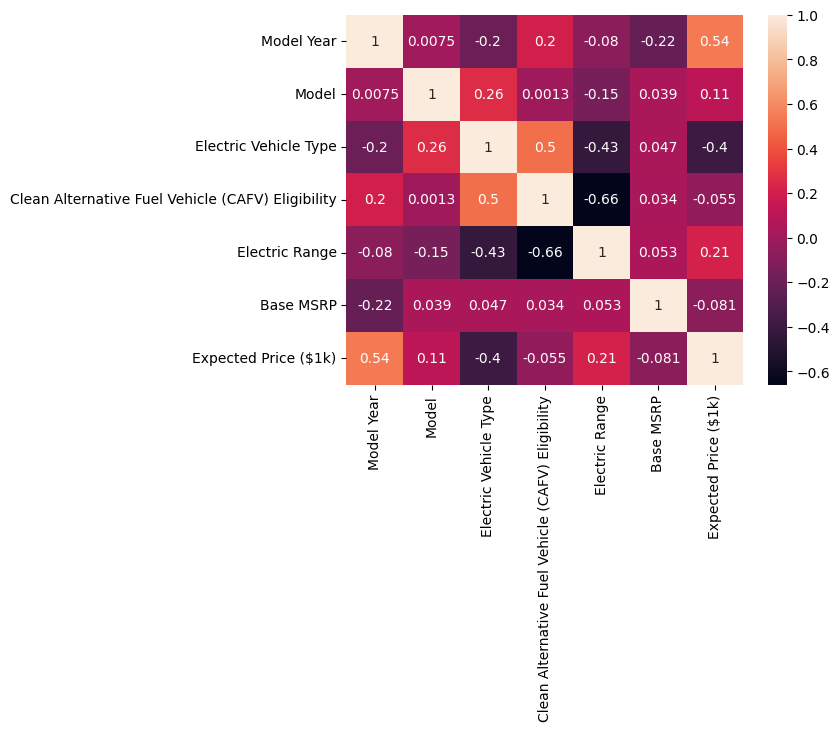

In [45]:
correlation = df.corr()
sns.heatmap(correlation , annot= True)

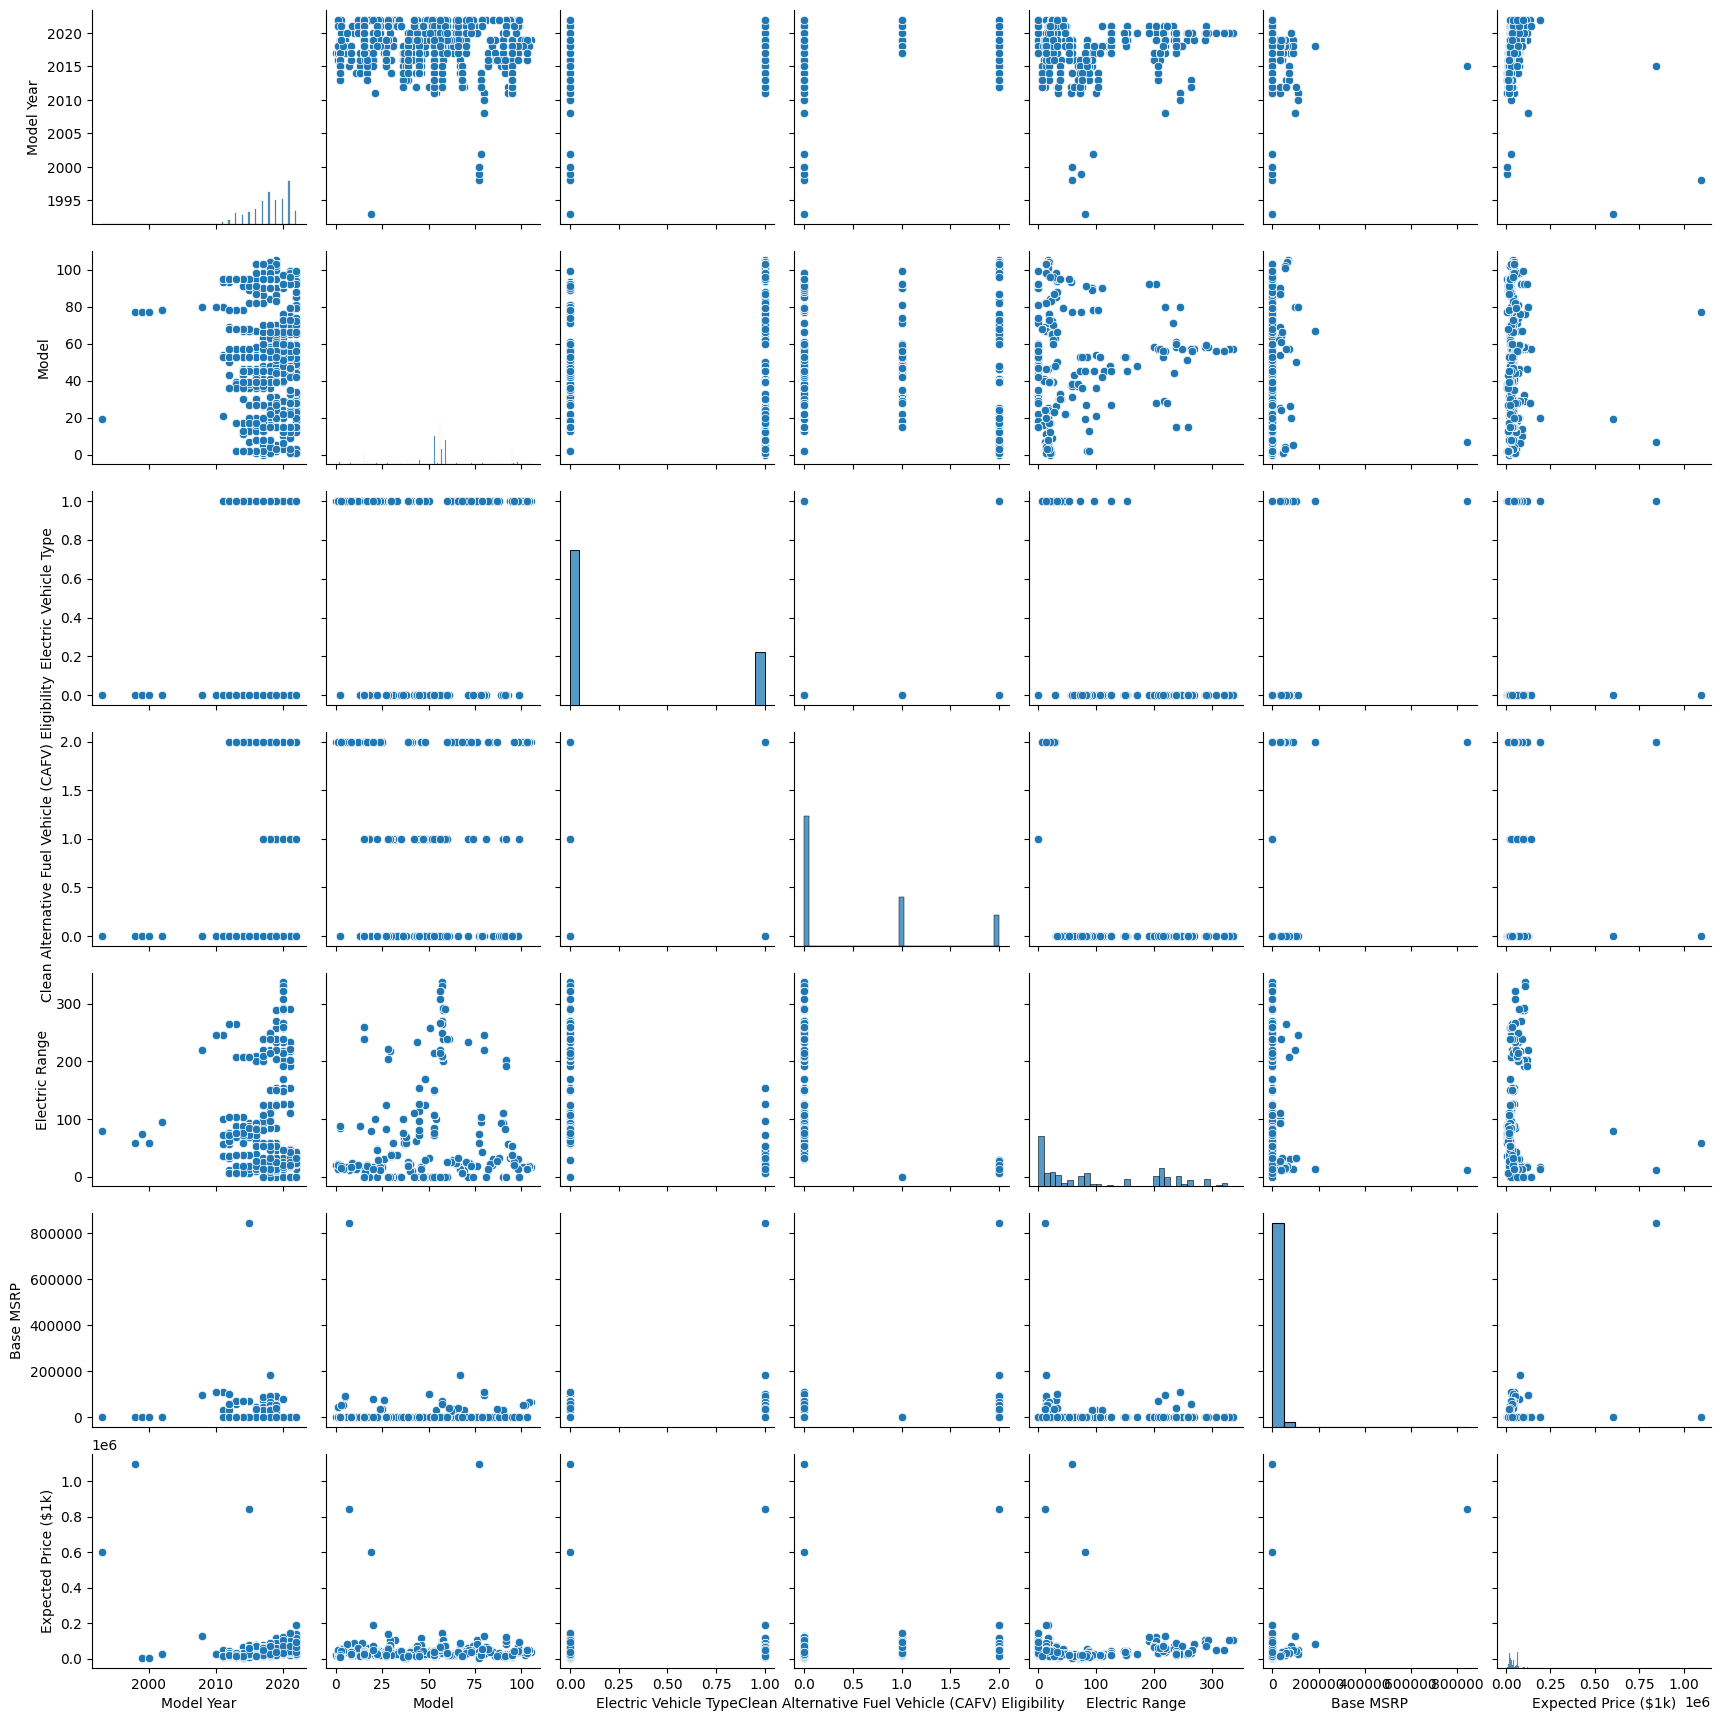

In [46]:
sns.pairplot(df)

In [47]:
def plots(df):
    figure = make_subplots(2,4)
    for i , column in enumerate(df.columns) :
        row = (i//4)+1
        col = (i%4)+1
        figure.add_trace(go.Box(y=df[column] , name= column) , row= row , col= col)
    figure.update_layout(width = 1000 , showlegend = False)
    figure.show()

plots(df)

In [48]:
df1 = df.copy()

In [49]:
df1

Model Year  Model  Electric Vehicle Type  \
0          2020.0     56                      0   
1          2011.0     53                      0   
2          2015.0     45                      0   
3          2013.0     95                      1   
4          2019.0     15                      0   
...           ...    ...                    ...   
64348      2020.0     60                      0   
64349      2013.0     68                      1   
64350      2018.0     15                      0   
64351      2017.0     20                      1   
64352      2019.0     53                      0   

       Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                                                      0             308   
1                                                      0              73   
2                                                      0              81   
3                                                      0              38   
4                                                      0             238   
...                                                  ...             ...   
64348                                                  0             239   
64349                                                  2               6   
64350                                                  0             238   
64351                                                  2              14   
64352                                                  0             150   

       Base MSRP  Expected Price ($1k)  
0              0               50000.0  
1              0               15000.0  
2              0               18000.0  
3              0               33900.0  
4              0               41780.0  
...          ...                   ...  
64348          0               33000.0  
64349          0               13300.0  
64350          0               22857.0  
64351          0               45700.0  
64352          0               35000.0  

[64338 rows x 7 columns]

In [50]:
X = df1.drop(columns= 'Expected Price ($1k)')
Y = df1['Expected Price ($1k)']

In [51]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size= 0.2 , random_state= 42)

X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((51470, 6), (12868, 6), (51470,), (12868,))

In [52]:
scaler = StandardScaler().fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [60]:
svr = SVR()
grid = {
    "gamma":[0.01 ,  0.1] ,
    "degree" : [2 , 3 ] , 
    "C" : [0.1  , 1 , 10] , 
    "kernel" : ['linear' , 'poly' , 'rbf']
}
g = GridSearchCV(svr , grid , scoring= 'r2')

In [61]:
g.fit(X_train , Y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3],
                         'gamma': [0.01, 0.1],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='r2')

In [62]:
g.best_params_

{'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}

In [63]:
g.best_score_

np.float64(0.5211583090223828)

In [64]:
final_model = g.best_estimator_

In [65]:
y_pred = final_model.predict(X_test)

In [67]:
r_squared = r2_score(Y_test , y_pred)

In [68]:
r_squared

0.5570862471146127